# 04. USA Analysis

This notebook provides a deep dive into the COVID-19 situation in the United States, utilizing county-level data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(style="whitegrid")
data_dir = "../archive"

## 1. Load Data

In [2]:
usa_county = pd.read_csv(os.path.join(data_dir, "usa_county_wise.csv"))
usa_county['Date'] = pd.to_datetime(usa_county['Date'])

/tmp/ipykernel_7411/631010758.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  usa_county['Date'] = pd.to_datetime(usa_county['Date'])


## 2. Latest Data Snapshot
Filtering for the most recent date in the dataset.

In [3]:
latest_date = usa_county['Date'].max()
usa_latest = usa_county[usa_county['Date'] == latest_date]
print(f"Analysis based on data from: {latest_date.date()}")

Analysis based on data from: 2020-07-27


## 3. Top 10 States by Confirmed Cases
Aggregating county data to state level.

/tmp/ipykernel_7411/1774948652.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Confirmed', y='Province_State', data=top_states, palette='Blues_r')


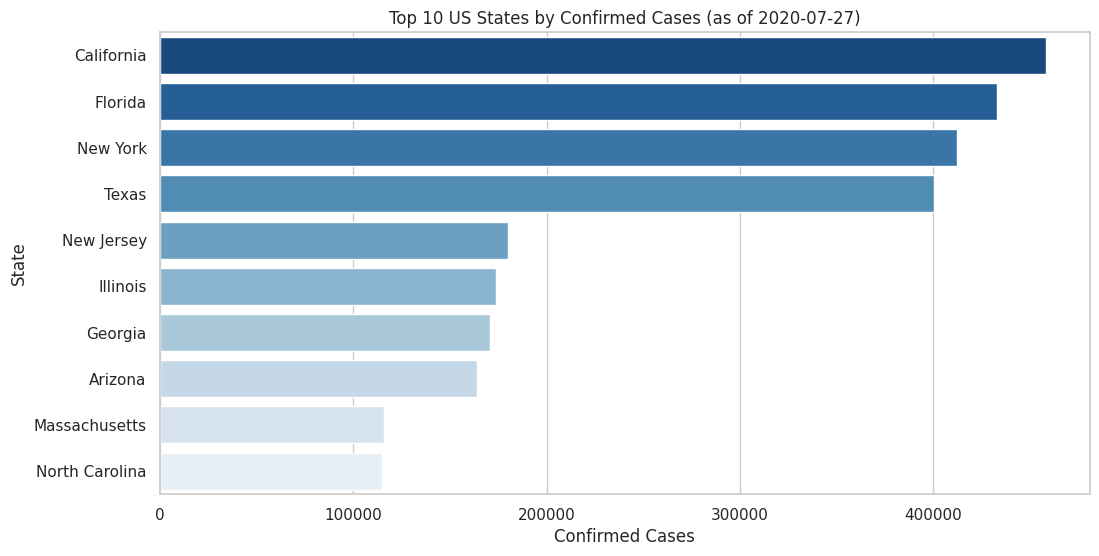

In [4]:
state_data = usa_latest.groupby('Province_State')[['Confirmed', 'Deaths']].sum().reset_index()
top_states = state_data.nlargest(10, 'Confirmed')

plt.figure(figsize=(12, 6))
sns.barplot(x='Confirmed', y='Province_State', data=top_states, palette='Blues_r')
plt.title(f'Top 10 US States by Confirmed Cases (as of {latest_date.date()})')
plt.xlabel('Confirmed Cases')
plt.ylabel('State')
plt.show()

## 4. Distribution of Cases Across Counties
Visualizing the spread of case counts across all US counties.

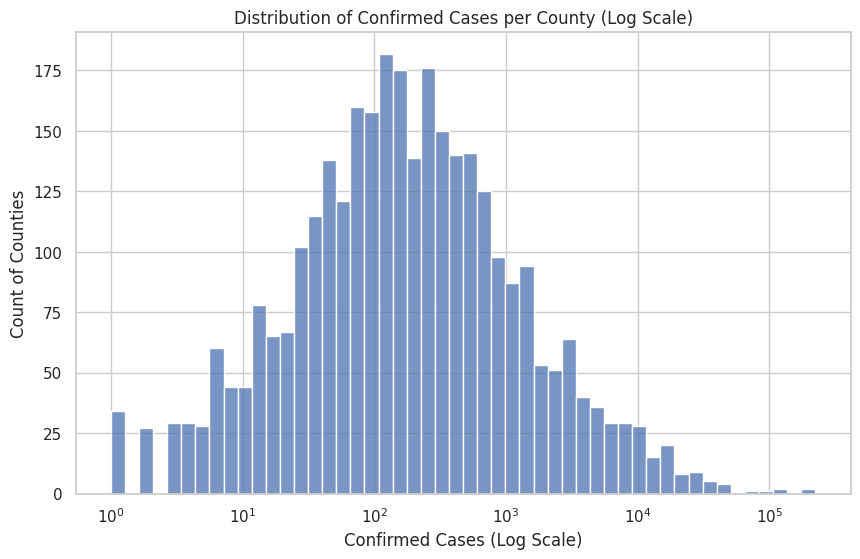

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(usa_latest[usa_latest['Confirmed'] > 0]['Confirmed'], bins=50, log_scale=True)
plt.title('Distribution of Confirmed Cases per County (Log Scale)')
plt.xlabel('Confirmed Cases (Log Scale)')
plt.ylabel('Count of Counties')
plt.show()